<a href="https://colab.research.google.com/github/SeanSec/Application_Projects/blob/main/Malware_Detection_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS456-Lab 5: Malware Detection using Machine Learning



#### <font color=green> Student Name: Sean Cobb</font>

The data is from Kaggle `Malware detection with machine learning`
https://www.kaggle.com/code/maidaly/malware-detection-with-machine-learning

--------------

# Imports

In [ ]:

import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay



# Task 1

### Read and Split data

In [ ]:
malware_data = pd.read_csv('MW-Data/dataset_malwares.csv')
test_data = pd.read_csv('MW-Data/dataset_test.csv')


X_train = malware_data.drop(columns=['Name', 'Machine', 'TimeDateStamp', 'Malware'])
y_train = malware_data['Malware']

X_test = test_data.drop(columns=['Name', 'Machine', 'TimeDateStamp'])
y_test = [0] * X_test.shape[0]

### Build Model

In [ ]:
rfc2 = RandomForestClassifier(n_estimators=100, random_state=0,
                         oob_score = True,
                         max_depth = 16)
rfc2.fit(X_train, y_train)

RandomForestClassifier(max_depth=16, oob_score=True, random_state=0)

### Test and Classification Report

In [ ]:
y_pred = rfc2.predict(X_test)


print(classification_report(y_test, y_pred, target_names=['Benign', 'Malware']))

              precision    recall  f1-score   support

      Benign       1.00      0.24      0.38        17
     Malware       0.00      0.00      0.00         0

    accuracy                           0.24        17
   macro avg       0.50      0.12      0.19        17
weighted avg       1.00      0.24      0.38        17



### Confusion Matrix

Text(50.722222222222214, 0.5, 'True labels')

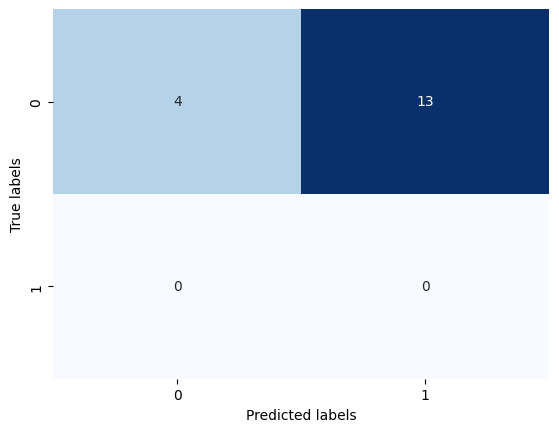

In [ ]:
ax=sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

### Conclusion

- The model proved very innaccurate (Accuracy = 24%)
  - This is likely due to being trained on an imbalanced dataset with a majority of the samples being malicious, then tested on a dataset with only benign samples. This result shows signs of overfitting in our model leaning heavily towards malicious.
- The precision numbers show us that we have no false negatives for classifying benign examples
  - This is expected, as there are no malicious samples. We did observe that a majority of the predicted outcomes were false positives, i.e. classifying benign samples incorrectly as malicious samples. Again this is most likely due to overfitting of the data in training our model.
- Training and testing on both datasets may be better
  - Training and testing on each dataset individually may lead to better results with less overfitting

-----

# Task 2

### Import Classifiers

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

### Prepare data
I talked to the professor and after showing him the low accuracy on task 1 he suggested I combine both datasets or make a test train split for each. I opted to combine the datsets and make a test train split for it.

In [ ]:
test_data['Malware'] = 0
combo_data = pd.concat([malware_data, test_data], ignore_index=True)

combo_X = combo_data.drop(columns=['Name', 'Machine', 'TimeDateStamp', 'Malware'])
combo_y = combo_data['Malware']

### Split Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(combo_X, combo_y, test_size=0.2, random_state=0)

### K-Neighbor Classifier

#### Create, fit, and predict

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

knn_y_pred = knn.predict(X_test)

#### Classification Report

In [ ]:
print(classification_report(y_test, knn_y_pred, target_names=['Benign', 'Malware']))

              precision    recall  f1-score   support

      Benign       0.94      0.91      0.93      1034
     Malware       0.97      0.98      0.97      2892

    accuracy                           0.96      3926
   macro avg       0.96      0.95      0.95      3926
weighted avg       0.96      0.96      0.96      3926



#### Confusion Matrix

Text(50.722222222222214, 0.5, 'True labels')

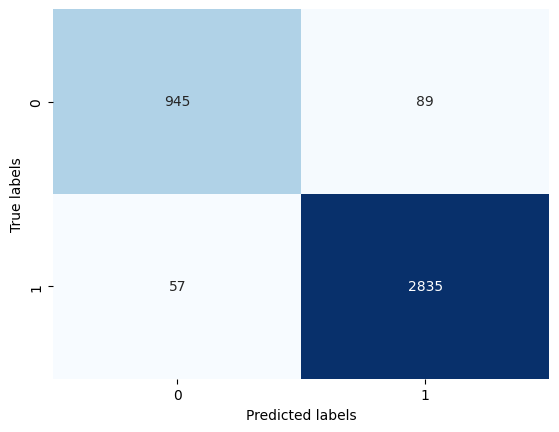

In [ ]:
ax=sns.heatmap(confusion_matrix(y_test, knn_y_pred), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

### Support Vector Classifier

#### Create, fit, and predict
I decided to go with a Linear SVC after watching the regular SVC take nearly 10 minutes to try and fit the data.

In [ ]:
svc = LinearSVC(C=1.0, max_iter=1000, random_state=0)
svc.fit(X_train, y_train)

svc_y_pred = svc.predict(X_test)

#### Classification Report

In [ ]:
print(classification_report(y_test, svc_y_pred, target_names=['Benign', 'Malware']))

              precision    recall  f1-score   support

      Benign       0.95      0.02      0.04      1034
     Malware       0.74      1.00      0.85      2892

    accuracy                           0.74      3926
   macro avg       0.85      0.51      0.44      3926
weighted avg       0.80      0.74      0.64      3926



#### Confusion Matrix

Text(50.722222222222214, 0.5, 'True labels')

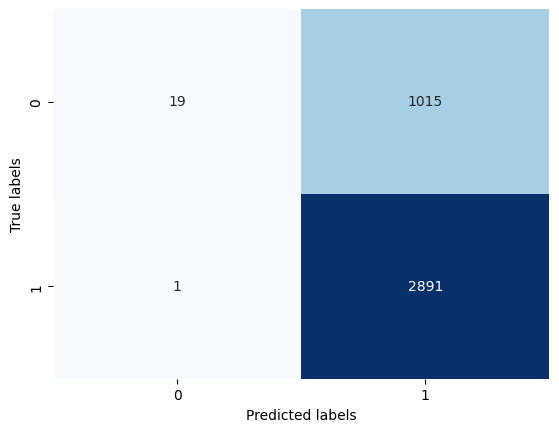

In [ ]:
ax=sns.heatmap(confusion_matrix(y_test, svc_y_pred), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

### Multi-Layer Perceptron Classifier

#### Create, fit, and predict

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(200, 100), max_iter=1000, random_state=0)
mlp.fit(X_train, y_train)

mlp_y_pred = mlp.predict(X_test)

#### Classification Report

In [ ]:
print(classification_report(y_test, mlp_y_pred, target_names=['Benign', 'Malware']))

              precision    recall  f1-score   support

      Benign       0.76      0.75      0.75      1034
     Malware       0.91      0.92      0.91      2892

    accuracy                           0.87      3926
   macro avg       0.84      0.83      0.83      3926
weighted avg       0.87      0.87      0.87      3926



#### Confusion Matrix

Text(50.722222222222214, 0.5, 'True labels')

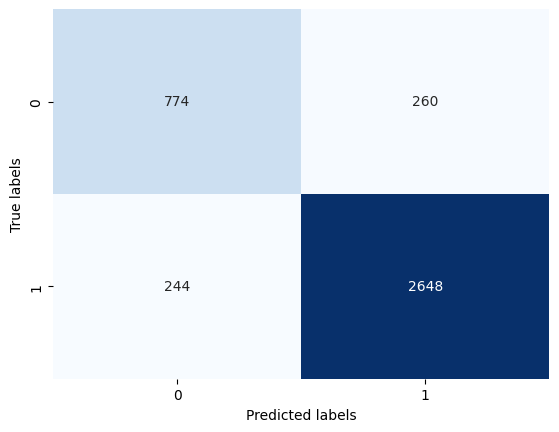

In [ ]:
ax=sns.heatmap(confusion_matrix(y_test, mlp_y_pred), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

### Conclusion
- K-Neighbor Classifier
  - Had the greatest accuracy of any models 96%.
  - More likely to classify incorrectly as a false positive than a false negative.
  - Higher precision of identifying malware than benign samples. This is likely due to the higher percentage of malware samples.
- Linear Support Vector Classifier
  - Least accurate of the 3 models 74%.
  - Significantly higher precision of recognizing benign samples versus malware samples. Not sure why this happened, but it's interesting.
  - Incredibly high rate of misidentifying false positives. Inversely, had the lowest amount of false negatives of any model (Rand Forest Classifier included) with only one false positive.
- Multi-Layer Perceptron Classifier
  - Middle of the pack in terms of accuracy 87%.
  - Significantly more precise when predicting malware versus benign samples. Could be explained by the higher percentage of malware samples in the datset.
  - Nearly identical rate of false postives and negatives.
- Overall
  - Combining the datasets improved the performance of the model significantly, as oppossed to training on the malware/mix dataset and testing on the purely benign datset.
  - Interestingly, the LinearSVC had the lowest amount of false negatives by a significant margin. Since classifying a false negative is the worst thing one of the classifiers could do (considering the context of identifying malware) it does lend credence to the plausibility of the SVC potentially being the optimal model so far.

-----

# Task 3

### Imports

In [ ]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## K-Means Clustering

In [ ]:
X = malware_data.drop(columns=['Name', 'Machine', 'TimeDateStamp', 'Malware'])
y = malware_data['Malware']

#### Scaling and Dimensional Reduction

Clustering models perform poorly on datasets with a large number of features. I tried before and reached a peak accuracy of 24%. Thus, I decided I need scale the features, and reduce the feature space to the most primary components. I tested for the optimal amount of principal components, but that came out with 46 components. This did not turn into realistic results. Thus, through more testing I reached a peak accuracy with 12 principal components.

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=12)
X_pca = pca.fit_transform(X_scaled)

#### Building and fitting cluster model
Through futher testing with clusters I concluded that the optimal amount of clusters to use was 5. The standard classification report we were formerly using does not allow anything other than 2 clusters, which lowers our accuracy. I left an original classification report in for you to test if you so choose.

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X_pca)

kmeans_y_pred = kmeans.predict(X_pca)

In [ ]:
#print(classification_report(y, kmeans_y_pred, target_names=['Benign', 'Malware']))

#### Mapping clusters through confusion matrix
Thus, to fix this issue and increase accuracy I used an initial confusion matrix to reduce down to 2 clusters and improve accuracy. The mapped prediction finds which labels imply benign and which imply malware, then changing the labels accordingly.

In [ ]:
temp_conf_matrix = confusion_matrix(y, kmeans_y_pred)
map_y_pred = np.where(kmeans_y_pred == temp_conf_matrix[0, 1].argmax(), 1, 0)

#### Classification report
This increased my accuracy significantly.

In [ ]:
print(classification_report(y, map_y_pred, target_names=['Benign', 'Malware']))

              precision    recall  f1-score   support

      Benign       0.69      0.30      0.42      5012
     Malware       0.80      0.95      0.87     14599

    accuracy                           0.79     19611
   macro avg       0.75      0.63      0.64     19611
weighted avg       0.77      0.79      0.75     19611



#### Confusion matrix

Text(50.722222222222214, 0.5, 'True labels')

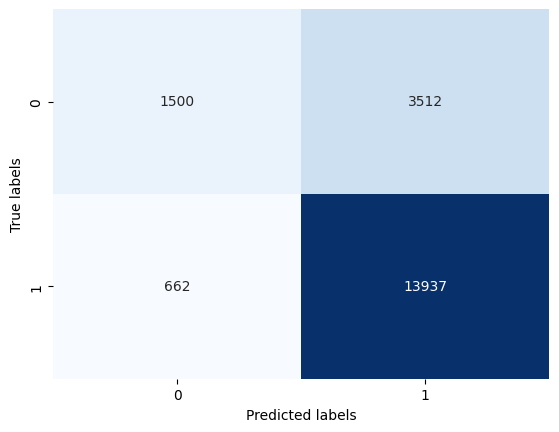

In [ ]:
ax=sns.heatmap(confusion_matrix(y, map_y_pred), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

## Gaussian Mixture Clustering

#### Building and fitting cluster model

In [ ]:
gmm = GaussianMixture(n_components=5, random_state=0)
gmm.fit(X_pca)

gmm_y_pred = gmm.predict(X_pca)

#### Mapping components through confusion matrix

In [ ]:
temp_conf_matrix = confusion_matrix(y, gmm_y_pred)
map_y_pred = np.where(gmm_y_pred == temp_conf_matrix[0, 1].argmax(), 1, 0)

#### Classification Report

In [ ]:
print(classification_report(y, map_y_pred, target_names=['Benign', 'Malware']))

              precision    recall  f1-score   support

      Benign       0.51      0.36      0.42      5012
     Malware       0.80      0.88      0.84     14599

    accuracy                           0.75     19611
   macro avg       0.65      0.62      0.63     19611
weighted avg       0.73      0.75      0.73     19611



#### Confusion Matrix

Text(50.722222222222214, 0.5, 'True labels')

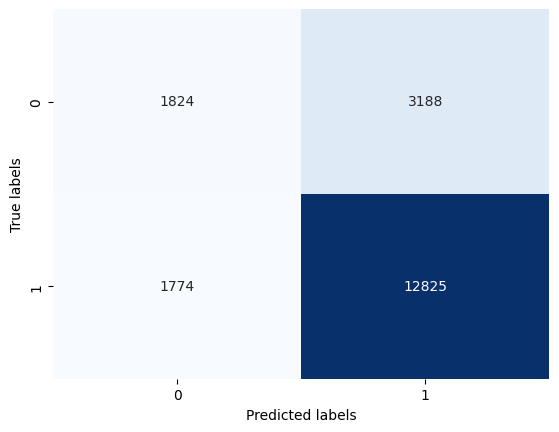

In [ ]:
ax=sns.heatmap(confusion_matrix(y, map_y_pred), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

## Conclusions
- K-Means Clustering
  - Accuracy was inhibited by the spread of the data caused by a large amount of data features. Still, the maximum accuracy I was able to reach was decent, but never reached the levels of my classification models. 79%
  - Significantly better at recalling malware, but not very good at recognizing benign samples. F1 scores were halved for benign samples. This could be compunded by the overfitting of malware samples, and large amount of features.
  - Over double the number of false positives than true negatives, but far less false negatives which is very good.
- Gaussian Mixture Clustering
  - Accuracy was similar to our K-means model, but performed worse overall. 75%
  - Was identical to K-means model in identifying malware, but performed 18% worse when attempting to identify benign samples. I'm unsure why this is so different between the two models and will have to investigate this further.
  - There were far more false negatives with this model than there were in our K-means model. This inhibits this model from any possibility of performing as this is the most dangerous mistake our model can make and it is over 2 times more likely to misclassify samples in this manner.
- Overall
  - Our clusters may perform better on smaller less complex data. even when scaling and reducing the dimensionality of this data the models performed at best to an average performance. These models are not as good as most of our classifiers and still the Random Forest Classifier was our best model.